Importes that you might need are given below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

# The Harmonic Oscillator

Start with one dimensional harmonic trap: $V=\frac{1}{2}m\omega^2 x^2$

**Simulation details:**

Number of particles: 1.

Initial position: x = 5 Angstrom.

Initial momenta: Zero.

Nsteps = 10000.

trap frequency, $\hbar\omega = 50 meV$

**Questions \& Figures**


1. Figure 1: Plot the change in the total energy with respect to t=0 (in precent) vs. time for different values of dt.
What is the largest dt you can use so that the energy is conserved better than 0.1% of its initial value?
1. Figure 2: Plot the position of the particle vs. time. Explain the observed dynamics.
1. Figure 3: Plot the potential and kinteic energies vs. time.
1. Figure 4: Plot the histogram of the position of the particle.
1. Figure 5: Plot the histogram of the momenta of the particle.
Explain the shape of the histograms in Figures 4-5. How do you excpect them to change in the canonical ensemble?


### calc E(0) 

In [3]:
mass = 6.633E-26
omega = 7.596E13
posX = 5E-10
print(0.5 * (posX * omega) ** 2 * mass)

4.7839862466e-17


## figure 1

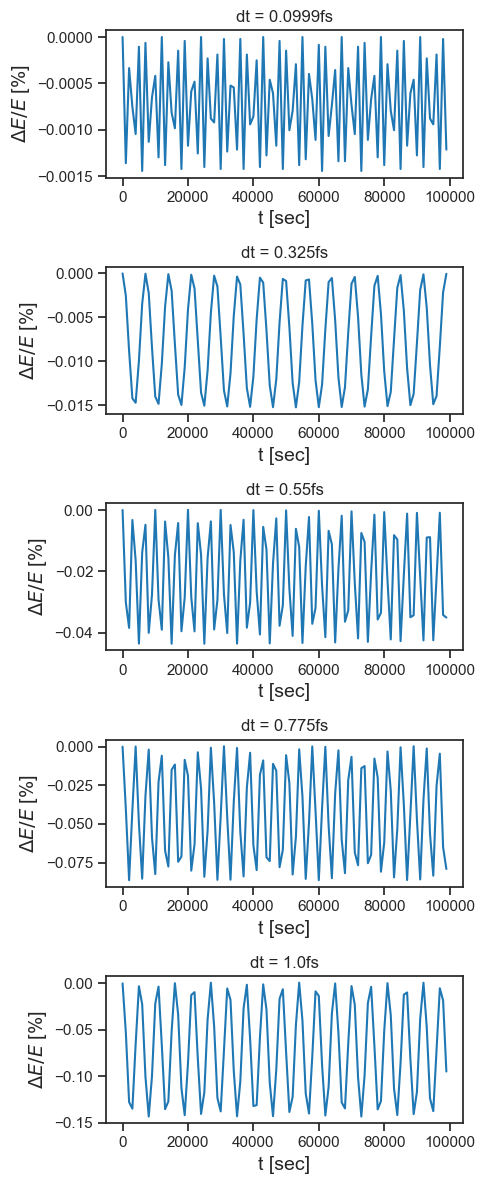

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')


# just an example, you can do somthing else
fig, ax = plt.subplots(5,1,figsize=(5,12))
for i, dt in enumerate(np.linspace(0.1E-15, 0.1E-14, 5)):
    df = pd.read_csv("simForFig1_" + str(i) + ".log", sep='\s+')
    ax[i].plot(df["step"].values, (df["E"].values - df['E'].values[0]) * 100/ df['E'].values[0])
    ax[i].set_title("dt = " + str(dt * 1E15)[:6] + "fs")
    ax[i].set_xlabel('t [sec]')
    ax[i].set_ylabel(r'$\Delta E/E$ [%]')



plt.tight_layout()


### $\Delta E/E$ [%] to dt

8.333333333333334e-16


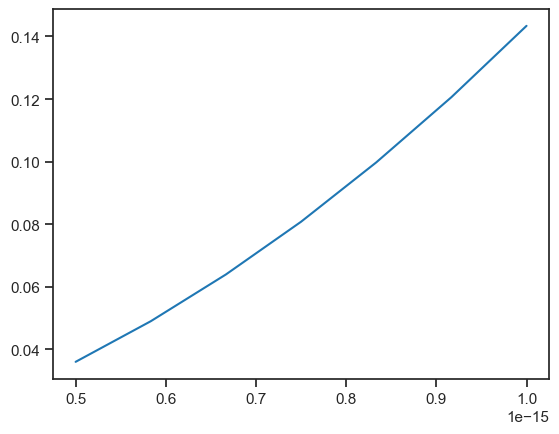

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

lst = []
prevDt = 0
found = False
for i, dt in enumerate(np.linspace(0.5E-15, 1E-15, 7)):
    df = pd.read_csv("simForFigDt_" + str(i) + ".log", sep='\s+')
    maxDiff = max(abs((df["E"].values - df['E'].values[0]) * 100/ df['E'].values[0]))
    #print(maxDiff)
    if maxDiff >= 0.1 and not found:
        print(prevDt)
        found = True
    lst.append(maxDiff)
    prevDt = dt
plt.plot(np.linspace(0.5E-15, 1E-15, 7), lst)



## Fig 2

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000]
[4.989991, 4.347339, 2.826252, 0.7340846, -1.506414, -3.442522, -4.683025, -4.977263, -4.265782, -2.692345, -0.5748854, 1.658737, 3.55719, 4.736868, 4.959401, 4.179824, 2.555661, 0.4150933, -1.809349, -3.668189, -4.785825, -4.936424, -4.089556, -2.416341, -0.254873, 1.958095, 3.775405, 4.829846, 4.908356, 3.995

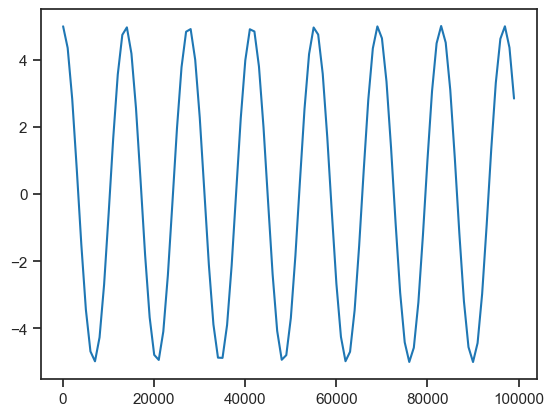

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForFig2.xyz", 'r')
# N = int(xyz.readline())
# header = xyz.readline()
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    if(count % 3 == 0):
        #print(i)
        pass
    elif(count % 3 == 1):
        #print(i)
        line = i.split()
        time.append(int(line[1]))
    else:
        line = i.split()
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

# print(time)
# print(posX)
# print(len(time))
# print(len(posX))
plt.plot(time, posX)    
